# Face recognition/detection

https://pypi.org/project/mtcnn/

In [1]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.python.client import device_lib
print('Available GPUs')
for d in device_lib.list_local_devices():
    print(d.physical_device_desc)

Available GPUs

device: 0, name: METAL, pci bus id: <undefined>
Metal device set to: Apple M2 Pro


### Let us import some test images

In [3]:
img1 = plt.imread('pictures/test_image1.jpg')
img2 = plt.imread('pictures/test_image2.jpg')
img3 = plt.imread('pictures/test_image3.jpg')
img4 = plt.imread('pictures/test_image4.jpg')
img5 = plt.imread('pictures/test_image5.jpg')

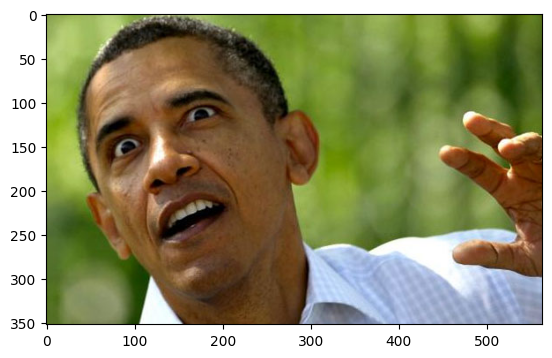

In [4]:
plt.imshow(img1);

### Instantiate a pre-trained MTCNN

### Multi-Task Cascaded Convolutional Neural Networks for Face Detection

More deails at: <A HREF=https://towardsdatascience.com/robust-face-detection-with-mtcnn-400fa81adc2e>Robust face detection with MTCNN</A>

In [5]:
detector = MTCNN()

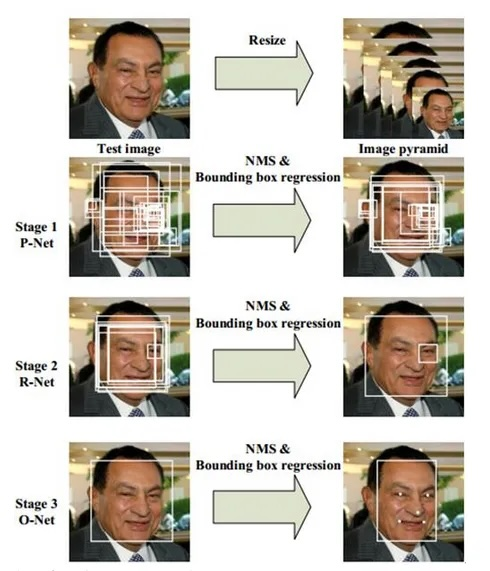

In [40]:
from IPython.display import Image
Image(filename='mtcnn.jpeg') 

In [6]:
target1 = detector.detect_faces(img1)
print(target1)

1/1 [==============================] - 0s 110ms/step


2023-12-04 19:53:31.356586: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 140ms/step
[{'box': [49, 47, 217, 265], 'confidence': 0.9999532699584961, 'keypoints': {'left_eye': (91, 153), 'right_eye': (177, 115), 'nose': (132, 176), 'mouth_left': (129, 247), 'mouth_right': (207, 214)}}]


In [7]:
face = target1[0]
display('First face: bounding box: {}'.format(face['box']))
display('Left-eye {}'.format(face['keypoints']['left_eye']))
display('Right-eye {}'.format(face['keypoints']['left_eye']))

'First face: bounding box: [49, 47, 217, 265]'

'Left-eye (91, 153)'

'Right-eye (91, 153)'

Let define a simpe function to plot boxes around detected faces

In [8]:
def plot_face(img, targets, highlight_details=False):
    fig, ax = plt.subplots()
    ax.imshow(img)
    face_id=1
    labels = []
    for face in targets:
        face_box = face['box']
        x = face_box[0]
        y = face_box[1]
        w = face_box[2]
        h = face_box[3]
        rect = Rectangle((x,y) ,w,h, edgecolor='yellow', fill=False)
        ax.add_patch(rect)
        ax.text(x+w+10, y+40, str(face_id), fontsize=14, label=face_id, weight='bold', color='yellow')
        labels.append('Face {}: confidence={:.3f}'.format(face_id, face['confidence']))

        if highlight_details:
            x = face['keypoints']['left_eye'][0]
            y = face['keypoints']['left_eye'][1]    
            plt.plot(x,y, marker='+', color='yellow', markersize=10)

            x = face['keypoints']['right_eye'][0]
            y = face['keypoints']['right_eye'][1]   
            
            plt.plot(x,y, marker='+', color='yellow', markersize=10)
        
            x, y = face['keypoints']['nose']  
            
            plt.plot(x,y, marker='x', color='yellow', markersize=20)
            
        face_id = face_id + 1
    plt.show()
    for s in labels:
        print(s)
    
    return

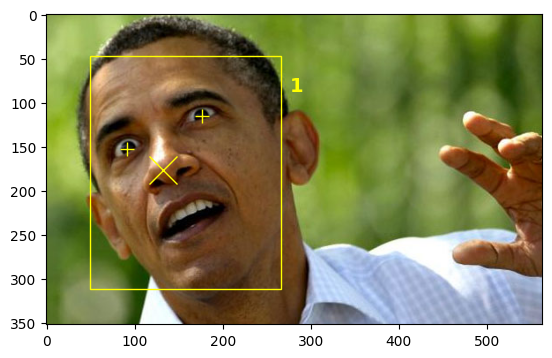

Face 1: confidence=1.000


In [9]:
plot_face(img1, target1, True)

1/1 [==============================] - 0s 89ms/step


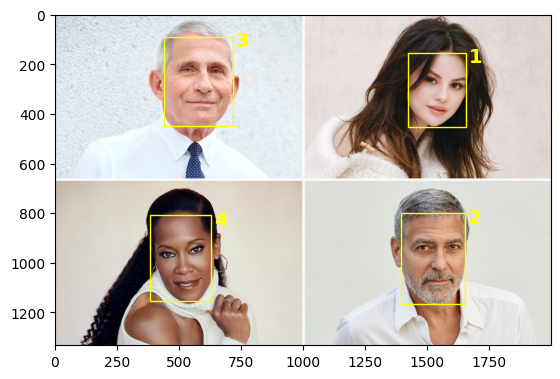

Face 1: confidence=1.000
Face 2: confidence=1.000
Face 3: confidence=1.000
Face 4: confidence=0.995


In [10]:
target2 = detector.detect_faces(img2)
plot_face(img2, target2)

1/1 [==============================] - 0s 115ms/step


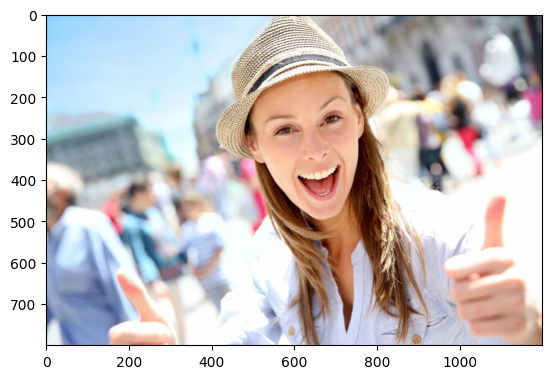

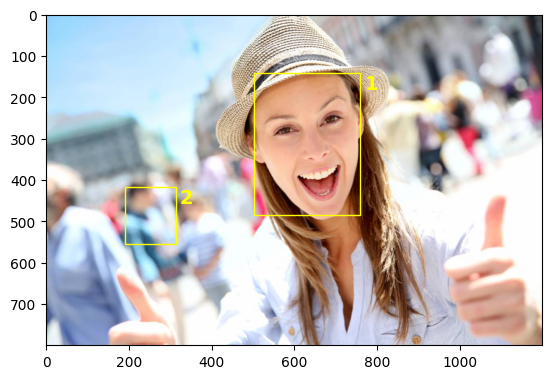

Face 1: confidence=0.998
Face 2: confidence=0.851


In [11]:
target3 = detector.detect_faces(img3)
plt.imshow(img3)
plot_face(img3, target3)

1/1 [==============================] - 0s 93ms/step


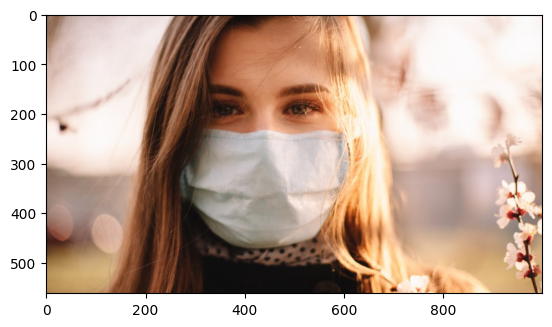

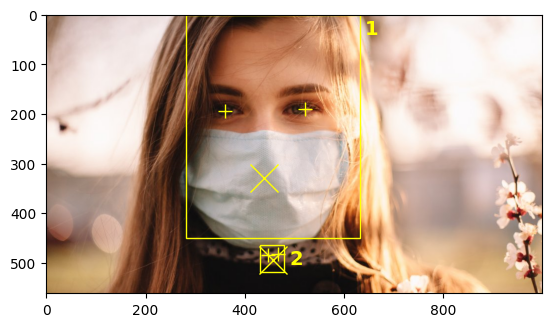

Face 1: confidence=0.999
Face 2: confidence=0.876


[{'box': [282, 0, 350, 451],
  'confidence': 0.9993332028388977,
  'keypoints': {'left_eye': (360, 193),
   'right_eye': (521, 190),
   'nose': (438, 330),
   'mouth_left': (375, 371),
   'mouth_right': (517, 365)}},
 {'box': [430, 464, 50, 54],
  'confidence': 0.8761558532714844,
  'keypoints': {'left_eye': (447, 484),
   'right_eye': (467, 483),
   'nose': (457, 495),
   'mouth_left': (447, 503),
   'mouth_right': (465, 504)}}]

In [12]:
targets = detector.detect_faces(img4)
plt.imshow(img4)
plot_face(img4, targets, highlight_details=True)
targets

1/1 [==============================] - 0s 99ms/step


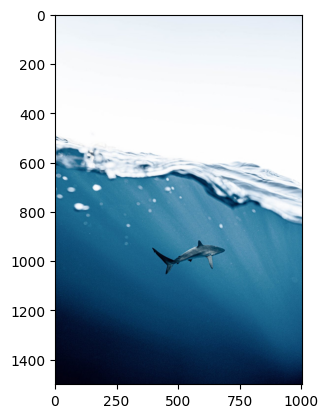

In [13]:
targets = detector.detect_faces(img5)
plot_face(img5, targets)

In [14]:
targets

[]

# Object recognition/detection/tracking

<A HREF='http://imageai.org'>ImageAI</A> a Recognition and Detection AI framework

https://imageai.readthedocs.io/en/latest/

In [15]:
from imageai.Classification import ImageClassification

prediction = ImageClassification()
prediction.setModelTypeAsResNet50()
prediction.setModelPath("resnet50-19c8e357.pth")
prediction.loadModel()

# prediction.setModelTypeAsResNet50()
# prediction.setModelPath('data/classification/resnet50_imagenet_tf.2.0.h5')


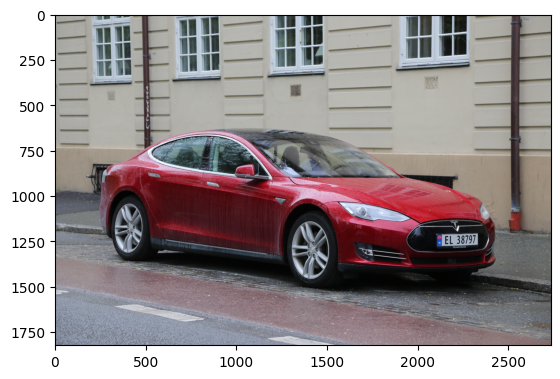

In [16]:
img = plt.imread('pictures/car.jpg')
plt.imshow(img);

In [17]:
predictions, probabilities = prediction.classifyImage(img, result_count=10)


In [18]:
for c,p in zip(predictions, probabilities):
    print('Class: {:20} prob={:6.3}%'.format(c,p))

Class: sports car           prob=  65.6%
Class: convertible          prob=  12.4%
Class: car wheel            prob=   8.0%
Class: beach wagon          prob=  5.31%
Class: grille               prob=  4.78%
Class: racer                prob= 0.777%
Class: limousine            prob= 0.437%
Class: parking meter        prob= 0.276%
Class: cab                  prob= 0.258%
Class: pickup               prob= 0.236%


## Detecting objects (image)

In [19]:
from imageai.Detection import ObjectDetection

import os
import imageai

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
# detector.setModelTypeAsRetinaNet()
# detector.setModelPath( os.path.join(execution_path , 'data/detector/resnet50_coco_best_v2.1.0.h5'))
detector.setModelPath("yolov3.pt")
detector.loadModel()

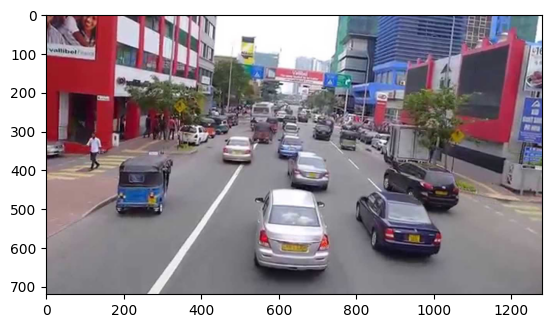

In [20]:
img = plt.imread('pictures/test_image.jpg')
plt.imshow(img)

In [21]:
(boxed_img, objects) = detector.detectObjectsFromImage(input_image=img, output_type="array")

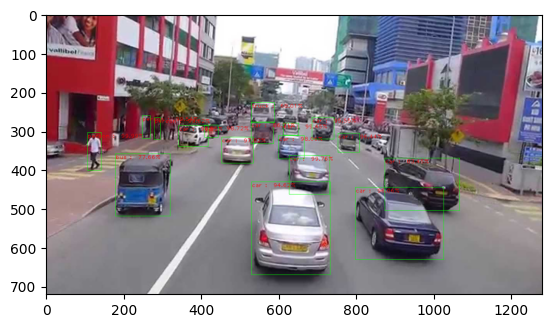

In [22]:
plt.imshow(boxed_img);

In [23]:
objects

[{'name': 'person',
  'percentage_probability': 99.99,
  'box_points': [107, 304, 142, 402]},
 {'name': 'person',
  'percentage_probability': 99.54,
  'box_points': [248, 261, 269, 320]},
 {'name': 'person',
  'percentage_probability': 99.62,
  'box_points': [279, 266, 295, 322]},
 {'name': 'car',
  'percentage_probability': 96.06,
  'box_points': [798, 445, 1026, 631]},
 {'name': 'car',
  'percentage_probability': 97.82,
  'box_points': [453, 316, 535, 383]},
 {'name': 'car',
  'percentage_probability': 94.62,
  'box_points': [530, 431, 733, 670]},
 {'name': 'car',
  'percentage_probability': 99.76,
  'box_points': [627, 363, 732, 463]},
 {'name': 'car',
  'percentage_probability': 83.45,
  'box_points': [874, 370, 1067, 505]},
 {'name': 'car',
  'percentage_probability': 98.06,
  'box_points': [600, 312, 666, 372]},
 {'name': 'car',
  'percentage_probability': 90.55,
  'box_points': [342, 286, 418, 340]},
 {'name': 'car',
  'percentage_probability': 99.45,
  'box_points': [612, 280, 

In [24]:
def highlight_object(img, obj_id, objects):
    if type(obj_id)==int:
        obj_id = [obj_id]
    
    fig, ax = plt.subplots()
    ax.imshow(img);
    for i in range(len(obj_id)):
        box=objects[i]['box_points']
        x = box[0]
        y = box[1]
        w = box[2]-x
        h = box[3]-y
        rect = Rectangle((x,y) ,w,h, edgecolor='yellow', fill=False)
        ax.add_patch(rect)
        ax.text(x+w+10, y+40, str(i), fontsize=14, label=str(i+1), weight='bold', color='yellow')
        print('{:2d} : {:10s} confidence = {:.3f}%'.format(i, objects[i]['name'], objects[i]['percentage_probability']))


 0 : person     confidence = 99.990%
 1 : person     confidence = 99.540%
 2 : person     confidence = 99.620%


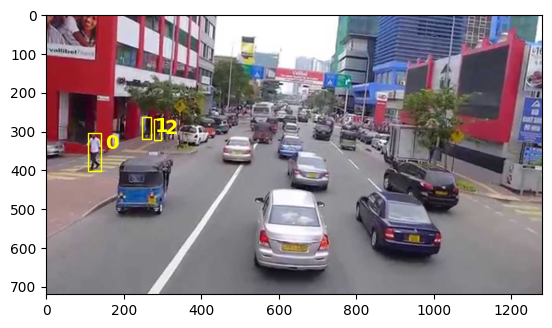

In [25]:
highlight_object(img, [0,1,3], objects)

## Detecting objects (Video)

In [26]:
from imageai.Detection import VideoObjectDetection

video_detector = VideoObjectDetection()
video_detector.setModelTypeAsRetinaNet()
video_detector.setModelPath('retinanet_resnet50_fpn_coco-eeacb38b.pth')
video_detector.loadModel()

In [27]:
from IPython.display import Video

Video(url='videos/traffic-mini.mp4')

In [28]:
video_detector.detectObjectsFromVideo(input_file_path='videos/traffic-mini.mp4',
                                      output_file_path='videos/traffic-mini-detected.mp4',
                                      frames_per_second=10)


systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


'videos/traffic-mini-detected.mp4.mp4'

In [29]:
objects_per_second=[]

def each_second_analysis(second_number, output_arrays, count_arrays, average_output_count):
    objects_per_second.append({'second':second_number, 'objects':output_arrays } )

In [30]:
tags = {'motorcycle','car'}
tracked_objs=[]

def forFrame(frame_number, output_array, output_count):
    objs = []
    for i in range(len(output_array)):
        if output_array[i]['name'] in tags:
            objs.append(output_array[i])
    tracked_objs.append( { 'frame':frame_number, 'objects':objs})

In [31]:
video_detector.detectObjectsFromVideo(input_file_path='videos/traffic-mini.mp4', 
                                      output_file_path='videos/traffic-mini-detected',
                                      save_detected_video=True,
                                      per_frame_function=forFrame,
                                      minimum_percentage_probability=40,
                                      frames_per_second=1)

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


'videos/traffic-mini-detected.mp4'

The library provides only avi format, to be played on a Jupyter notebook the video has been converted (under linux) with:
ffmpeg -i traffic-mini-detected.avi traffic-mini-detected.mp4

In [32]:
from IPython.display import Video

Video('videos/traffic-mini-detected.mp4')

In [33]:
tracked_objs[0]

{'frame': 1,
 'objects': [{'name': 'car',
   'percentage_probability': 82.61,
   'box_points': [750, 212, 853, 312]},
  {'name': 'car',
   'percentage_probability': 79.14,
   'box_points': [463, 200, 507, 293]},
  {'name': 'motorcycle',
   'percentage_probability': 75.43,
   'box_points': [93, 275, 144, 361]},
  {'name': 'car',
   'percentage_probability': 65.08,
   'box_points': [127, 158, 198, 272]},
  {'name': 'car',
   'percentage_probability': 58.5,
   'box_points': [720, 212, 768, 295]},
  {'name': 'car',
   'percentage_probability': 55.66,
   'box_points': [450, 209, 494, 325]},
  {'name': 'car',
   'percentage_probability': 52.21,
   'box_points': [41, 120, 111, 149]}]}

In [34]:
def plot_frame_with_bboxes(img, objs):
    fig, ax = plt.subplots()
    ax.imshow(im0)
    
    for o in objs:
        box = o['box_points']
        x = box[0]
        y = box[1]
        w = box[2]-x
        h = box[3]-y
        ax.add_patch(Rectangle((x,y) ,w,h, edgecolor='yellow', fill=False))  

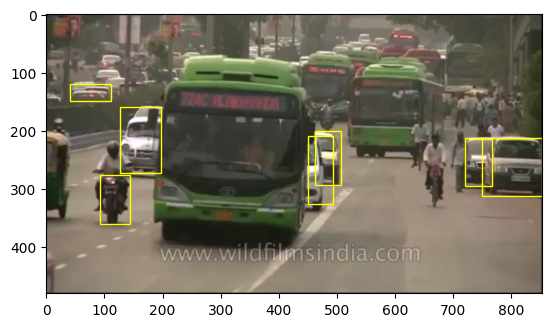

In [35]:
import imageio

reader = imageio.get_reader('videos/traffic-mini.mp4')
im0 = reader.get_next_data()

# plot_frame_with_bboxes(im0, tracked_objs[0]['obj'])
plot_frame_with_bboxes(im0, tracked_objs[0]['objects'])

In [45]:
import time

# Define the duration (in seconds) of the video capture here
capture_duration = 5
  
# This will return video from the first webcam on your computer. 
cap = cv2.VideoCapture(0)   
  
# Define the codec and create VideoWriter object 
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480)) 
  
# loop runs if capturing has been initialized.  
start_time = time.time()


while(int(time.time() - start_time) < capture_duration ): 
    # reads frames from a camera  
    # ret checks return at each frame 
    ret, frame = cap.read()  
  
    # Converts to grayscale space, OCV reads colors as BGR 
    # frame is converted to gray 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
      
    # output the frame 
    out.write(gray)  
      
    # The original input frame is shown in the window  
    cv2.imshow('Original', frame) 
  
    # The window showing the operated video stream  
    cv2.imshow('frame', gray) 
  
      
    # Wait for 'a' key to stop the program  
    if cv2.waitKey(1) & 0xFF == ord('a'): 
        break
  

# After we release our webcam, we also release the out-out.release()  

cap.release() 

out.release()

  
# De-allocate any associated memory usage  
cv2.destroyAllWindows() 

print('DONE')


DONE
